## Introduction:

The data set that I am working with is government collected affordable housing data. It is the database associated with the Housing Affordability Data System (HADS). Below are the variables included. 

- AGE1: Age of head of household
- ASSISTED: Assisted Housing
- BEDRMS: # of bedrooms in unit
- BUILT: Year unit was built 
- BURDEN: Housing cost as a fraction of income
- COSTMED: Housing cost at Median interest
- FMR: Fair Market Rent
- L80: Low income limit (average)
- METRO3: Central city/suburban status
- NUNITS: # of units in building
- OTHERCOST: Insurance, condo, land rent, or other mobile home fees
- OWNRENT: Tenure (adjusted)
- PER: # of persons in household
- REGION: Census Region
- ROOMS: # of room in unit
- STRUCTURETYPE: Recoded structure type
- TOTSAL: Total Wage Income
- TYPE: Structure Type
- UTILITY: Monthly utility cost
- VALUE: Current Market Value of Unit
- ZADEQ: Recoded adequacy of housing
- ZINC2: Household Income
- ZSHMC: Monthly housing costs


For this project, I will be cleaning the data, exploring the data, running logistics regressions and the classification models Random Forest and XGBoost. The goal is to answer the question, "Which of the previous features of affordable housing units make the unit "affordable"?

Load Packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


First, I load the data in and preview it. 

In [2]:
df = pd.read_csv("Housing_Data.csv")

In [3]:
df.head(5)

,AGE1,METRO3,REGION,FMR,L80,BEDRMS,BUILT,TYPE,VALUE,VACANCY,...,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COSTMED,TOTSAL,ASSISTED,BURDEN
0,82,3,1,956,40322,2,2006,1,40000,-6,...,1,533,1,1,169.000000,213.750000,615.156712,0,-9,0.354919
1,50,5,3,1100,45744,4,1980,1,130000,-6,...,1,487,1,1,245.333333,58.333333,1058.988479,123000,-9,0.047527
2,53,5,3,1100,36614,4,1985,1,150000,-6,...,1,1405,1,1,159.000000,37.500000,1068.025168,28000,-9,0.602703
3,67,5,3,949,36614,3,1985,1,200000,-6,...,1,279,1,1,179.000000,70.666667,1411.700224,0,-9,0.103911
4,26,1,3,737,39421,2,1980,1,-6,-6,...,1,759,5,2,146.000000,12.500000,759.000000,96900,0,0.094019


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64535 entries, 0 to 64534
Data columns (total 24 columns):
AGE1             64535 non-null int64
METRO3           64535 non-null int64
REGION           64535 non-null int64
FMR              64535 non-null int64
L80              64535 non-null int64
BEDRMS           64535 non-null int64
BUILT            64535 non-null int64
TYPE             64535 non-null int64
VALUE            64535 non-null int64
VACANCY          64535 non-null int64
NUNITS           64535 non-null int64
ROOMS            64535 non-null int64
PER              64535 non-null int64
ZINC2            64535 non-null int64
ZADEQ            64535 non-null int64
ZSMHC            64535 non-null int64
STRUCTURETYPE    64535 non-null int64
OWNRENT          64535 non-null int64
UTILITY          64535 non-null float64
OTHERCOST        64535 non-null float64
COSTMED          64535 non-null float64
TOTSAL           64535 non-null int64
ASSISTED         64535 non-null int64
BURDEN     

### Null Values
The next step is to get rid of all of the null values. In this dataset, the null values are represented by negative numbers. For continuous variables, I'll replace with the median value or for binomial variables I'll replace with the most frequent variable. 

In [5]:
df.AGE1.unique()

array([82, 50, 53, 67, 26, 56, 60, 59, 54, 25, 52, 22, 55, 57, 84, 74, 70,
       62, 32, -9, 41, 15, 24, 28, 40, 86, 39, 34, 64, 71, 72, 45, 33, 29,
       65, 42, 51, 23, 31, 49, 43, 38, 66, 36, 58, 44, 76, 37, 88, 35, 93,
       30, 73, 63, 68, 61, 46, 77, 19, 69, 47, 81, 85, 80, 87, 27, 21, 75,
       78, 20, 48, 79, 83, 89, 17, 18, 16, 13, 14])

In [6]:
df.AGE1.median()

50.0

In [7]:
df.AGE1 = df.AGE1.replace(-9, 50)

In [8]:
df.METRO3.unique()

array([3, 5, 1, 2, 4])

In [9]:
df.REGION.unique()

array([1, 3, 4, 2])

In [10]:
df.BUILT = 2019-df["BUILT"]

In [11]:
df.VALUE.value_counts()

-6          27389
 150000      1918
 200000      1817
 100000      1774
 80000       1524
 300000      1444
 250000      1421
 180000      1381
 130000      1381
 90000       1317
 120000      1178
 70000       1089
 350000       991
 50000        979
 140000       967
 400000       925
 60000        908
 160000       818
 170000       798
 230000       785
 40000        763
 110000       696
 500000       653
 30000        645
 280000       636
 190000       603
 10000        598
 20000        552
 450000       541
 220000       487
            ...  
 510000         9
 980000         7
 1050000        7
 890000         6
 610000         6
 760000         6
 840000         5
 740000         5
 820000         5
 870000         4
 1350000        4
 1020000        4
 990000         3
 710000         3
 810000         3
 920000         3
 770000         2
 1010000        1
 910000         1
 1080000        1
 1240000        1
 960000         1
 860000         1
 1400000        1
 940000   

In [12]:
df.VALUE.median()
df.VALUE = df.VALUE.replace(-6, 60000)


In [13]:
df.BEDRMS.value_counts()

3    24850
2    16401
4    10189
1     9821
5     2209
0      622
6      392
7       51
Name: BEDRMS, dtype: int64

In [14]:
df.VACANCY.value_counts()

-6    60097
 1     2760
 3     1010
 5      284
 2      212
 4      172
Name: VACANCY, dtype: int64

In [15]:
df = df.drop("VACANCY", axis =1)

In [16]:
df = df.drop("OTHERCOST", axis = 1)

In [17]:
df.head(5)

,AGE1,METRO3,REGION,FMR,L80,BEDRMS,BUILT,TYPE,VALUE,NUNITS,...,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,COSTMED,TOTSAL,ASSISTED,BURDEN
0,82,3,1,956,40322,2,13,1,40000,1,...,18021,1,533,1,1,169.000000,615.156712,0,-9,0.354919
1,50,5,3,1100,45744,4,39,1,130000,1,...,122961,1,487,1,1,245.333333,1058.988479,123000,-9,0.047527
2,53,5,3,1100,36614,4,34,1,150000,1,...,27974,1,1405,1,1,159.000000,1068.025168,28000,-9,0.602703
3,67,5,3,949,36614,3,34,1,200000,1,...,32220,1,279,1,1,179.000000,1411.700224,0,-9,0.103911
4,26,1,3,737,39421,2,39,1,60000,100,...,96874,1,759,5,2,146.000000,759.000000,96900,0,0.094019


In [18]:
df.ZADEQ = df.ZADEQ.replace(-6, 1)

In [19]:
df.ZADEQ.unique()

array([1, 2, 3])

In [20]:
df.ZADEQ.value_counts()

1    61226
2     2148
3     1161
Name: ZADEQ, dtype: int64

In [21]:
df.ZINC2.median()

39987.0

In [22]:
df.ZINC2 = df.ZINC2.replace(-13, 39987.0)

In [23]:
df.ZINC2.max()

1061921

In [24]:
df = df.drop(df[df.ZINC2 > 150000].index)

In [25]:
len(df.ZINC2)

59473

In [26]:
df.ZINC2.max()

150000

In [27]:
df = df.drop(df[df.VALUE > 350000].index)

In [28]:
df.UTILITY.max()

1613.0

In [29]:
df = df.drop(df[df.UTILITY > 700].index)

In [30]:
df.ZSMHC.median()

747.0

In [31]:
df.ZSMHC = df.ZSMHC.replace(-6, 839.0)

In [32]:
df.STRUCTURETYPE.value_counts()

 1    32734
 3     7044
 2     5960
 5     4280
 4     2611
 6     2412
-9        2
Name: STRUCTURETYPE, dtype: int64

In [33]:
df.STRUCTURETYPE = df.STRUCTURETYPE.replace(-9, 1)

In [34]:
df.TOTSAL.value_counts()

 0         17075
-9          4222
 30000       867
 40000       845
 50000       831
 60000       766
 25000       725
 35000       626
 20000       620
 45000       593
 80000       589
 70000       557
 100000      533
 12000       487
 75000       465
 65000       459
 55000       441
 15000       430
 90000       404
 24000       385
 32000       375
 10000       373
 48000       314
 18000       310
 85000       302
 28000       294
 120000      283
 42000       279
 38000       273
 36000       272
           ...  
 58543         1
 31900         1
 23640         1
 23576         1
 5137          1
 52234         1
 19450         1
 7536          1
 81300         1
 4050          1
 20250         1
 32700         1
 53162         1
 44966         1
 106400        1
 28574         1
 42887         1
 139120        1
 118570        1
 25725         1
 30109         1
 28382         1
 34467         1
 140887        1
 15956         1
 67155         1
 40512         1
 17947        

In [35]:
df.TOTSAL.median()

18000.0

In [36]:
df.TOTSAL = df.TOTSAL.replace(-9, 24000)

In [37]:
df.ASSISTED.value_counts()

-9    31386
 0    17059
 1     6598
Name: ASSISTED, dtype: int64

In [38]:
df.ASSISTED = df.ASSISTED.replace(-9, 0)

### Defining the dependent variable.

Affordability will be calculated using the Burden variable. Housing units where the percentage of income to rent is greater than 30% are given a "1" (not affordable) while housing units where the percentage is <= 30% are given a "0" (affordable). This makes logistic regression and classification possible.

In [39]:
df.BURDEN.value_counts()

-9.000000    4222
-1.000000    1173
 0.000000     123
 0.300000      19
 0.400000      14
 0.360000      14
 0.120000      12
 0.312000      10
 0.500000      10
 0.200000      10
 0.320000       9
 0.285000       9
 0.280000       9
 6.000000       8
 0.252000       8
 0.250000       8
 0.210000       8
 0.240000       8
 0.168000       8
 0.480000       8
 0.220000       7
 0.216000       7
 0.330000       7
 0.324000       7
 0.288000       7
 0.192000       7
 0.285714       7
 0.800000       7
 0.285915       6
 0.166667       6
             ... 
 0.060507       1
 0.287587       1
 0.145603       1
 0.204512       1
 0.187032       1
 0.235309       1
 0.416044       1
 0.235234       1
 0.194039       1
 0.215206       1
 0.163975       1
 0.140328       1
 0.078100       1
 0.224849       1
 0.388889       1
 0.050985       1
 0.169695       1
 0.153155       1
 0.262547       1
 0.615108       1
 0.400653       1
 0.188525       1
 0.611155       1
 0.185915       1
 0.526335 

In [40]:
df = df[df.BURDEN != -9]
df = df[df.BURDEN != -1]

In [41]:
df.BURDEN.value_counts()

0.000000    123
0.300000     19
0.400000     14
0.360000     14
0.120000     12
0.312000     10
0.500000     10
0.200000     10
0.285000      9
0.280000      9
0.320000      9
0.240000      8
0.252000      8
0.480000      8
0.168000      8
0.210000      8
0.250000      8
6.000000      8
0.216000      7
0.285714      7
0.192000      7
0.220000      7
0.800000      7
0.324000      7
0.330000      7
0.288000      7
0.310000      6
0.520000      6
0.231429      6
0.375000      6
           ... 
0.060507      1
0.287587      1
0.145603      1
0.204512      1
0.187032      1
0.235309      1
0.416044      1
0.235234      1
0.194039      1
0.215206      1
0.163975      1
0.140328      1
0.078100      1
0.224849      1
0.388889      1
0.050985      1
0.169695      1
0.153155      1
0.262547      1
0.615108      1
0.400653      1
0.188525      1
0.611155      1
0.185915      1
0.526335      1
0.156462      1
1.146154      1
0.153404      1
0.328828      1
0.138588      1
Name: BURDEN, Length: 47

In [42]:
Burden_Val = []
for x in df["BURDEN"]:
    if x >= .30:
        Burden_Val.append("1")
    else:
        Burden_Val.append("0")

In [43]:
df["Burden_Val"] = Burden_Val

In [44]:
df["Burden_Val"].value_counts()

0    29840
1    19808
Name: Burden_Val, dtype: int64

In [45]:
df = df.drop("BURDEN", axis=1)

### Data Types

The next step is to check out the variable types and make sure that non-continuous datatypes are not classifed as integers, even if they are labeled with numbers.

In [46]:
df.dtypes

AGE1               int64
METRO3             int64
REGION             int64
FMR                int64
L80                int64
BEDRMS             int64
BUILT              int64
TYPE               int64
VALUE              int64
NUNITS             int64
ROOMS              int64
PER                int64
ZINC2              int64
ZADEQ              int64
ZSMHC              int64
STRUCTURETYPE      int64
OWNRENT            int64
UTILITY          float64
COSTMED          float64
TOTSAL             int64
ASSISTED           int64
Burden_Val        object
dtype: object

In [47]:
df.METRO3 = df.METRO3.astype('str')
df.REGION = df.REGION.astype('str')
df.TYPE = df.TYPE.astype('str')
df.OWNRENT = df.OWNRENT.astype('str')
df.STRUCTURETYPE = df.STRUCTURETYPE.astype('str')
df.ASSISTED = df.ASSISTED.astype('str')

### SECTION TWO: Examine the data


Correlation matrix is used to see which variables are highly correlated with each other. Those need to be removed to prevent overfitting of the data. A dark blue box in the below graph indicates highly correlated variables.

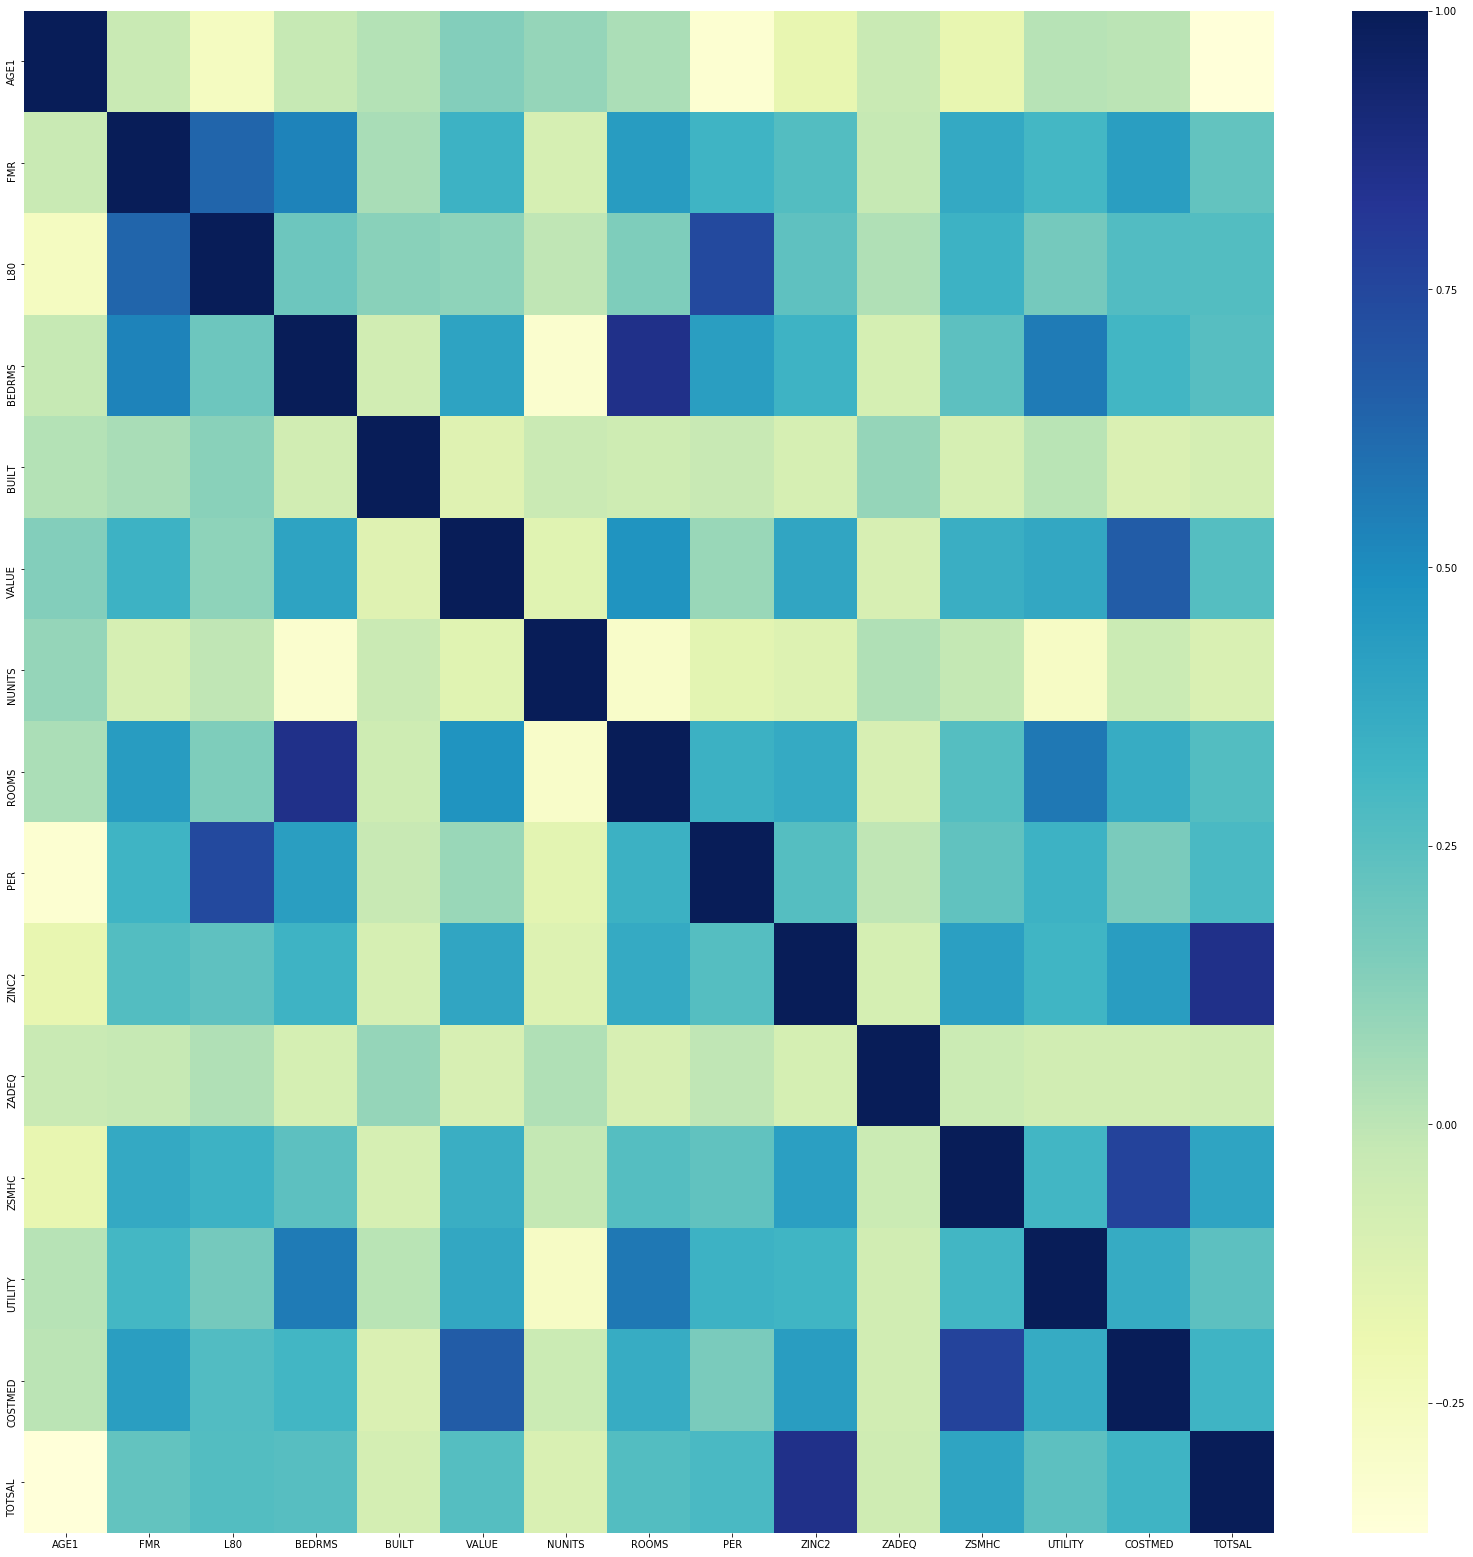

In [48]:

plt.figure(figsize = (28,28))
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu")

In [49]:
df = df.drop(["TOTSAL","COSTMED", "BEDRMS", "L80", "ZSMHC", "UTILITY"], axis = 1)

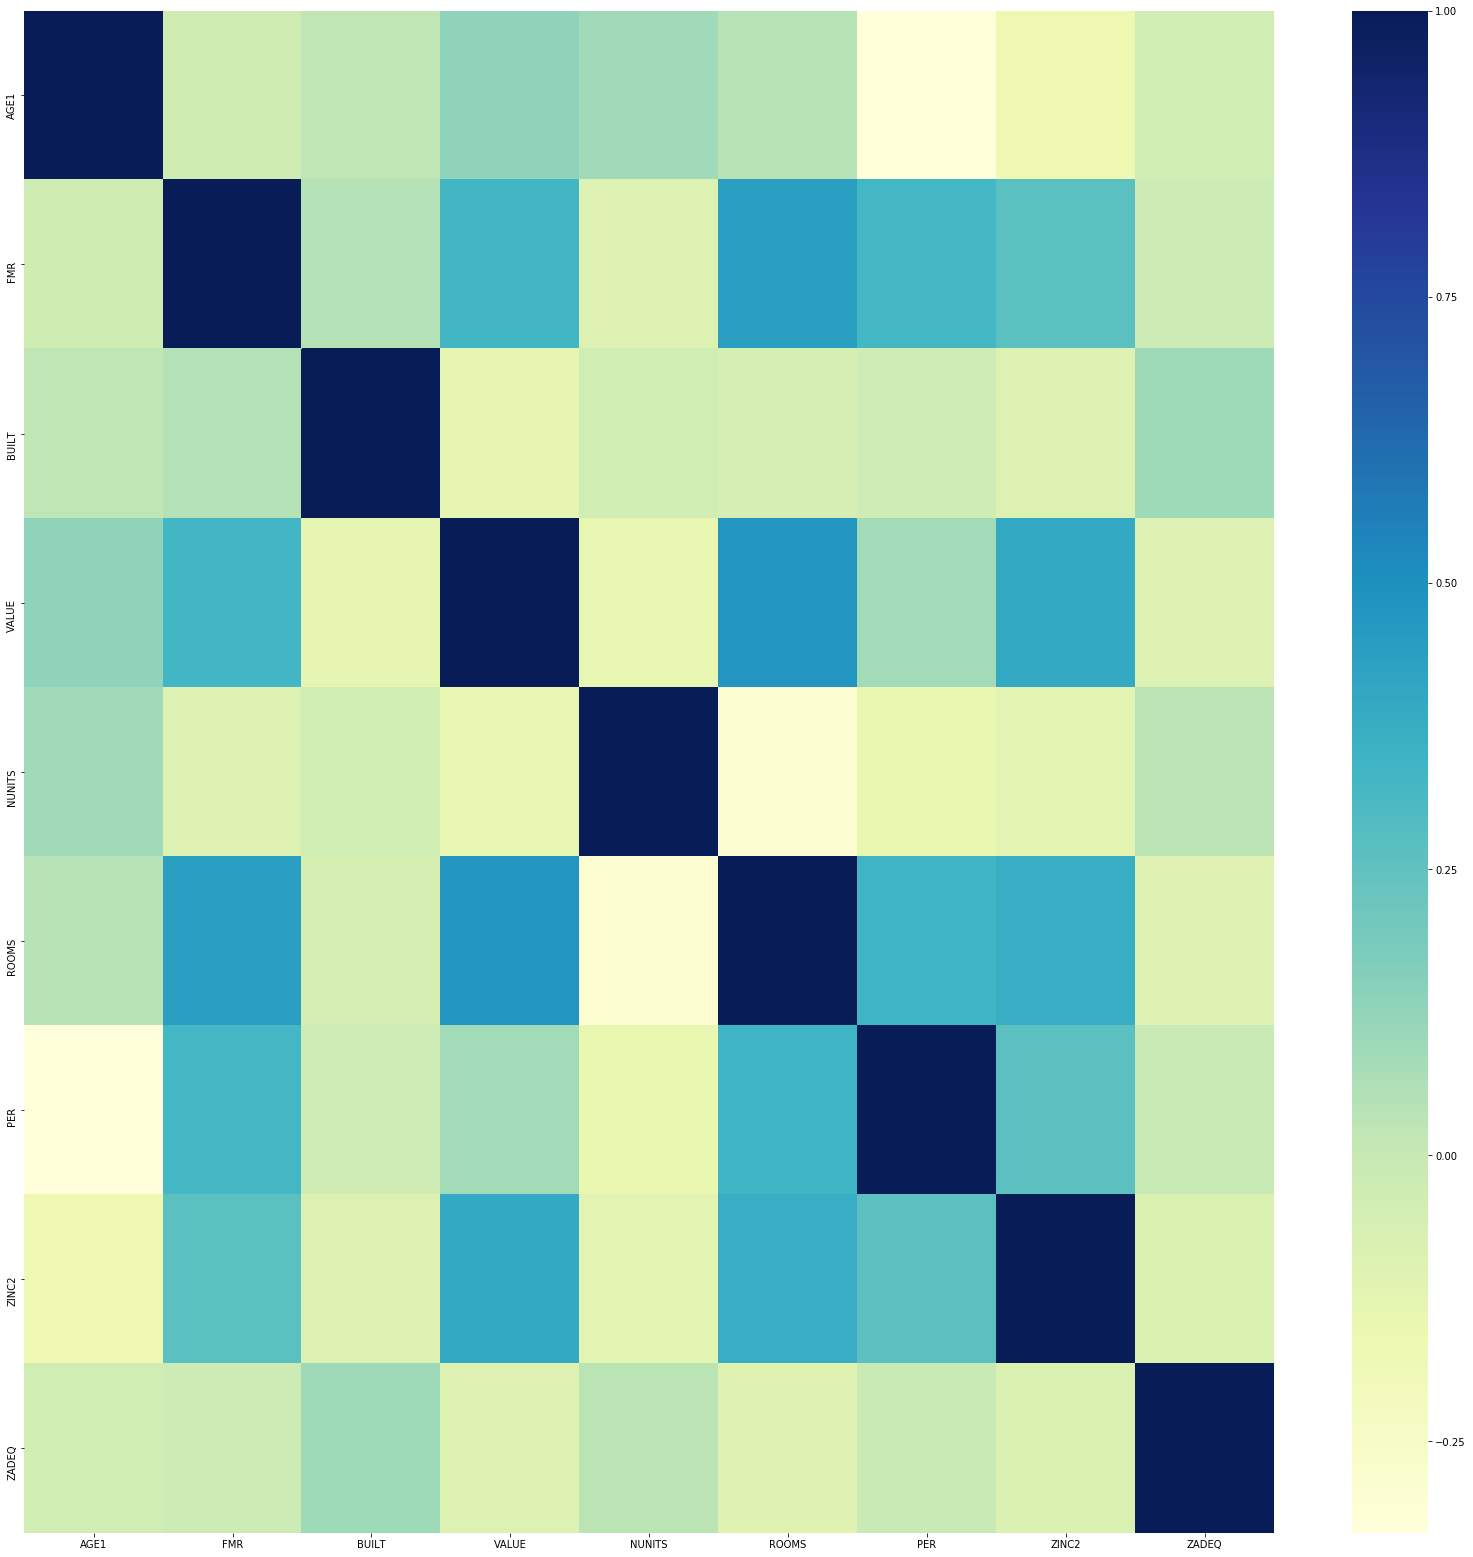

In [50]:
plt.figure(figsize = (28,28))
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu")

Next, we will look at the histograms of the data and to see if there are outliers in the data. From this information, ZINC2 and VALUE were two variables especially where I capped the highest number to get a more representative sample of the data. 

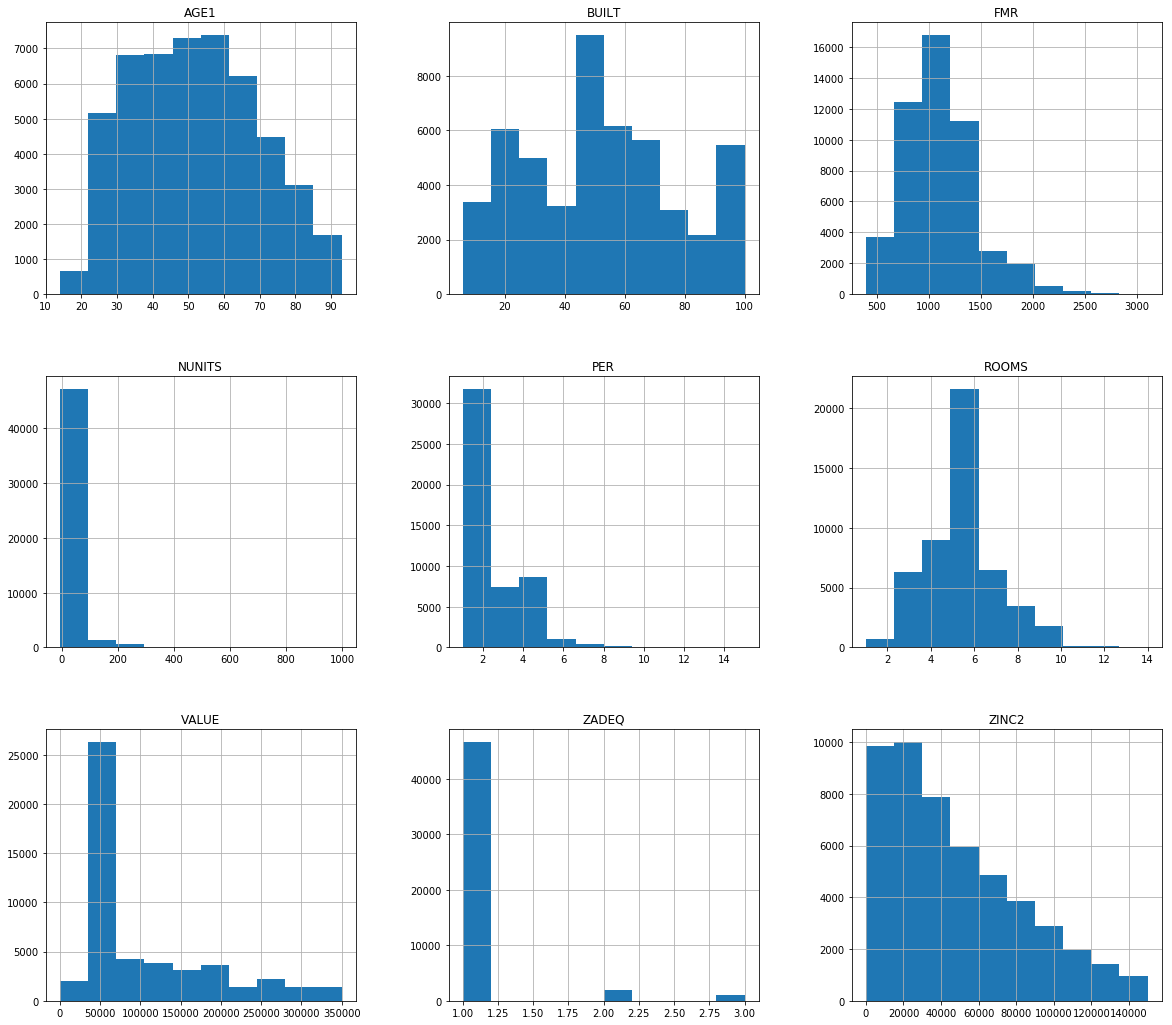

In [51]:
df.hist(figsize = (20,18));

#### Min/Max Scaling (normalization):

This is critical to performing modeling and classification. The following code will put all of the numeric variables on a scale from 0-1.

In [52]:

df["AGE1"] = (df["AGE1"]-min(df["AGE1"]))/ (max(df["AGE1"]) - min(df["AGE1"]))
df["FMR"] = (df["FMR"]-min(df["FMR"]))/ (max(df["FMR"]) - min(df["FMR"]))
df["BUILT"] = (df["BUILT"]-min(df["BUILT"]))/ (max(df["BUILT"]) - min(df["BUILT"]))
df["VALUE"] = (df["VALUE"]-min(df["VALUE"]))/ (max(df["VALUE"]) - min(df["VALUE"]))
df["NUNITS"] = (df["NUNITS"]-min(df["NUNITS"]))/ (max(df["NUNITS"]) - min(df["NUNITS"]))
df["ROOMS"] = (df["ROOMS"]-min(df["ROOMS"]))/ (max(df["ROOMS"]) - min(df["ROOMS"]))
df["PER"] = (df["PER"]-min(df["PER"]))/ (max(df["PER"]) - min(df["PER"]))
df["NUNITS"] = (df["NUNITS"]-min(df["NUNITS"]))/ (max(df["NUNITS"]) - min(df["NUNITS"]))
df["ZINC2"] = (df["ZINC2"]-min(df["ZINC2"]))/ (max(df["ZINC2"]) - min(df["ZINC2"]))
df["ZADEQ"] = (df["ZADEQ"]-min(df["ZADEQ"]))/ (max(df["ZADEQ"]) - min(df["ZADEQ"]))






## LOGISTIC REGRESSION

In this next step, we will perform a logistic regression. We will seperate the data into two datasets, one with the target variable (affordability) and the other with the clean and standarized features. Then, we'll fit a logistic regression model to the data.


First Step:

In [53]:
X = df

In [54]:
X.head()

,AGE1,METRO3,REGION,FMR,BUILT,TYPE,VALUE,NUNITS,ROOMS,PER,ZINC2,ZADEQ,STRUCTURETYPE,OWNRENT,ASSISTED,Burden_Val
0,0.860759,3,1,0.207687,0.074468,1,0.114283,0.007960,0.384615,0.000000,0.120445,0.0,1,1,0,1
1,0.455696,5,3,0.260902,0.351064,1,0.371427,0.007960,0.384615,0.214286,0.819802,0.0,1,1,0,0
2,0.493671,5,3,0.260902,0.297872,1,0.428570,0.007960,0.461538,0.071429,0.186775,0.0,1,1,0,1
3,0.670886,5,3,0.205100,0.297872,1,0.571427,0.007960,0.384615,0.071429,0.215072,0.0,1,1,0,0
4,0.151899,1,3,0.126755,0.351064,1,0.171426,0.106468,0.230769,0.071429,0.645949,0.0,5,2,0,0


In [55]:
y = X.Burden_Val

In [56]:
X = X[X.columns[:-1]]


In [57]:
y = y.astype('int')

In [58]:
X = pd.get_dummies(X)

In [59]:
X.head()

,AGE1,FMR,BUILT,VALUE,NUNITS,ROOMS,PER,ZINC2,ZADEQ,METRO3_1,...,STRUCTURETYPE_1,STRUCTURETYPE_2,STRUCTURETYPE_3,STRUCTURETYPE_4,STRUCTURETYPE_5,STRUCTURETYPE_6,OWNRENT_1,OWNRENT_2,ASSISTED_0,ASSISTED_1
0,0.860759,0.207687,0.074468,0.114283,0.007960,0.384615,0.000000,0.120445,0.0,0,...,1,0,0,0,0,0,1,0,1,0
1,0.455696,0.260902,0.351064,0.371427,0.007960,0.384615,0.214286,0.819802,0.0,0,...,1,0,0,0,0,0,1,0,1,0
2,0.493671,0.260902,0.297872,0.428570,0.007960,0.461538,0.071429,0.186775,0.0,0,...,1,0,0,0,0,0,1,0,1,0
3,0.670886,0.205100,0.297872,0.571427,0.007960,0.384615,0.071429,0.215072,0.0,0,...,1,0,0,0,0,0,1,0,1,0
4,0.151899,0.126755,0.351064,0.171426,0.106468,0.230769,0.071429,0.645949,0.0,1,...,0,0,0,0,1,0,0,1,1,0


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [61]:
from sklearn.feature_selection import RFE

In [62]:
import statsmodels.api as sm
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary2())

         Current function value: 0.434925
         Iterations: 35
                                 Results: Logit
Model:                   Logit                 Pseudo R-squared:      0.353     
Dependent Variable:      Burden_Val            AIC:                   43246.3091
Date:                    2019-07-10 12:25      BIC:                   43510.6905
No. Observations:        49648                 Log-Likelihood:        -21593.   
Df Model:                29                    LL-Null:               -33393.   
Df Residuals:            49618                 LLR p-value:           0.0000    
Converged:               0.0000                Scale:                 1.0000    
No. Iterations:          35.0000                                                
--------------------------------------------------------------------------------
                 Coef.     Std.Err.      z     P>|z|      [0.025       0.975]   
----------------------------------------------------------------------------

In [63]:
X_2 = df.drop(["ZADEQ","METRO3", "REGION", "TYPE","OWNRENT", "ASSISTED", "STRUCTURETYPE"], axis =1)

In [64]:
X_2.head()

,AGE1,FMR,BUILT,VALUE,NUNITS,ROOMS,PER,ZINC2,Burden_Val
0,0.860759,0.207687,0.074468,0.114283,0.007960,0.384615,0.000000,0.120445,1
1,0.455696,0.260902,0.351064,0.371427,0.007960,0.384615,0.214286,0.819802,0
2,0.493671,0.260902,0.297872,0.428570,0.007960,0.461538,0.071429,0.186775,1
3,0.670886,0.205100,0.297872,0.571427,0.007960,0.384615,0.071429,0.215072,0
4,0.151899,0.126755,0.351064,0.171426,0.106468,0.230769,0.071429,0.645949,0


In [65]:
y_2 = X_2.Burden_Val

In [66]:
y = y.astype('int')

In [67]:
X_2.head()

,AGE1,FMR,BUILT,VALUE,NUNITS,ROOMS,PER,ZINC2,Burden_Val
0,0.860759,0.207687,0.074468,0.114283,0.007960,0.384615,0.000000,0.120445,1
1,0.455696,0.260902,0.351064,0.371427,0.007960,0.384615,0.214286,0.819802,0
2,0.493671,0.260902,0.297872,0.428570,0.007960,0.461538,0.071429,0.186775,1
3,0.670886,0.205100,0.297872,0.571427,0.007960,0.384615,0.071429,0.215072,0
4,0.151899,0.126755,0.351064,0.171426,0.106468,0.230769,0.071429,0.645949,0


In [68]:
X_2 = X_2[X_2.columns[:-1]]

In [69]:
X_2 = pd.get_dummies(X_2)

In [70]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=0)

In [71]:
logreg_2 = LogisticRegression(fit_intercept = False, C = 1e12) 
model_log_2 = logreg_2.fit(X_train_2, y_train_2)
model_log_2

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [72]:
import statsmodels.api as sm
logit_model = sm.Logit(y, X_2)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.463866
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.310     
Dependent Variable: Burden_Val       AIC:              46076.0543
Date:               2019-07-10 12:25 BIC:              46146.5560
No. Observations:   49648            Log-Likelihood:   -23030.   
Df Model:           7                LL-Null:          -33393.   
Df Residuals:       49640            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
AGE1     -0.7038     0.0470   -14.9589   0.0000   -0.7960   -0.6116
FMR       4.9155     0.1138    43.2045   0.0000    4.6925 

## Evaluate the Regression

Below are functions that calculate the Precision, Recall and Accuracy of our model:

In [73]:
y_pred = logreg_2.predict(X_test_2)

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test_2, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      7496
           1       0.71      0.70      0.71      4916

   micro avg       0.77      0.77      0.77     12412
   macro avg       0.76      0.76      0.76     12412
weighted avg       0.77      0.77      0.77     12412



In [75]:
print('Accuracy on test set is: {:.2f}'.format(logreg_2.score(X_test_2, y_test_2)))

Accuracy on test set is: 0.77


Another way to view the results of the regression are a confusion matrix, which is calculated and visulized below. 

In [76]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test_2, y_pred)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[6127 1369]
 [1488 3428]]


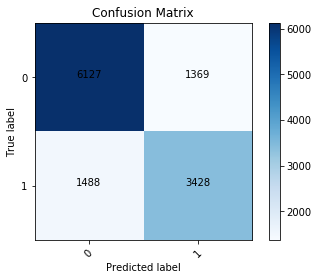

In [77]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

#Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')


class_names = set(y) 
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)


thresh = cnf_matrix.max() 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")


plt.colorbar()

The matrix above shows us the false positives and false negatives. This ration is how we will calculate the AUC score, which is below with a visualization. 

### SMOTE

Time to try to balance the data and see if that has an effect. 

In [79]:
sm = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train_2, y_train_2.ravel())
print(pd.Series(y_train_resampled).value_counts())
print()

0    22344
1    22344
dtype: int64



In [80]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train_resampled, y_train_resampled, random_state=0)

In [81]:
logreg2 = LogisticRegression(fit_intercept = False, C = 1e12)
model_log2 = logreg2.fit(X_train2, y_train2)
model_log2

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [82]:
y_pred2 = logreg2.predict(X_test2)

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      5610
           1       0.76      0.80      0.78      5562

   micro avg       0.77      0.77      0.77     11172
   macro avg       0.77      0.77      0.77     11172
weighted avg       0.77      0.77      0.77     11172



In [84]:
print('Accuracy on test set is: {:.2f}'.format(logreg2.score(X_test2, y_test2)))

Accuracy on test set is: 0.77


## RANDOM FOREST

The next model is a classification model. We will run this, see the accuracy, check important features, and then remove them in a second iteration of Random Forest to see if we can improve our model. Note that first we will refine the features, and then run SMOTE to see the effect of balancing the data. 

In [87]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train_2, y_train_2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [88]:
forest.score(X_train_2, y_train_2)

0.7815823396712859

In [89]:
forest.score(X_test_2, y_test_2)

0.7715114405414115

In [90]:
forest.feature_importances_


array([0.02002335, 0.0460373 , 0.00393028, 0.08272445, 0.05097712,
       0.01498175, 0.03633808, 0.74498768])

In [91]:
def plot_feature_importances(model):
    n_features = X_train_2.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train_2.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

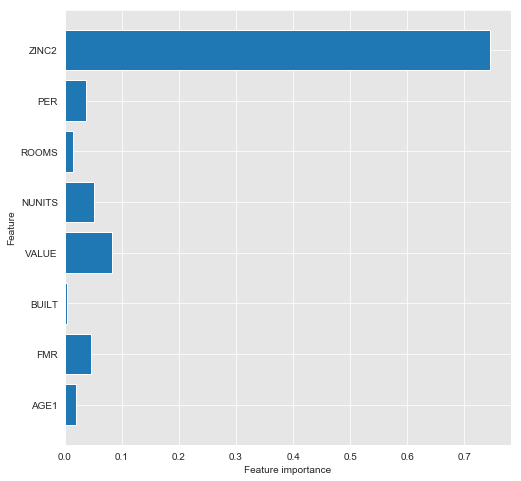

In [92]:
plot_feature_importances(forest)

## Second Random Forest

In [93]:
X2 = df.drop(["BUILT", "AGE1","ZADEQ","METRO3", "REGION", "TYPE","OWNRENT", "ASSISTED", "STRUCTURETYPE"], axis =1)


In [94]:
X2.head()

,FMR,VALUE,NUNITS,ROOMS,PER,ZINC2,Burden_Val
0,0.207687,0.114283,0.007960,0.384615,0.000000,0.120445,1
1,0.260902,0.371427,0.007960,0.384615,0.214286,0.819802,0
2,0.260902,0.428570,0.007960,0.461538,0.071429,0.186775,1
3,0.205100,0.571427,0.007960,0.384615,0.071429,0.215072,0
4,0.126755,0.171426,0.106468,0.230769,0.071429,0.645949,0


In [95]:
y2 = df.Burden_Val
y2= y2.astype(int)
X2 = X2[X2.columns[:-1]]
X2 = pd.get_dummies(X2)
X2.head()


,FMR,VALUE,NUNITS,ROOMS,PER,ZINC2
0,0.207687,0.114283,0.007960,0.384615,0.000000,0.120445
1,0.260902,0.371427,0.007960,0.384615,0.214286,0.819802
2,0.260902,0.428570,0.007960,0.461538,0.071429,0.186775
3,0.205100,0.571427,0.007960,0.384615,0.071429,0.215072
4,0.126755,0.171426,0.106468,0.230769,0.071429,0.645949


In [96]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=0)

In [97]:
forest2 = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest2.fit(X_train2, y_train2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [98]:
forest2.score(X_train2, y_train2)

0.7809646578579869

In [99]:
forest2.score(X_test2, y_test2)

0.7700612310667097

In [100]:
def plot_feature_importances(model):
    n_features = X_train2.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train2.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

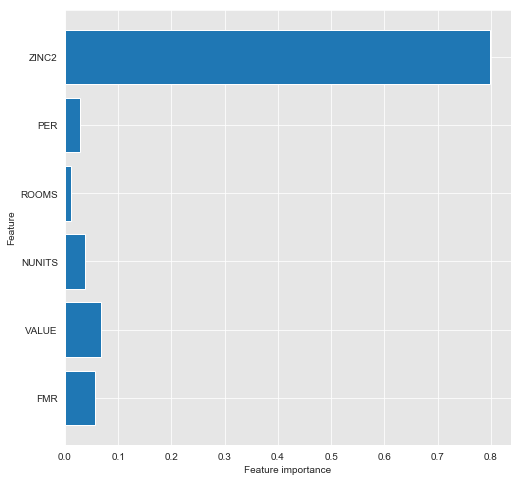

In [101]:
plot_feature_importances(forest2)

In [102]:
sm = SMOTE(random_state=0)
X_train_resampledRF, y_train_resampledRF = sm.fit_sample(X_train_2, y_train_2.ravel())
print(pd.Series(y_train_resampledRF).value_counts())
print()

0    22344
1    22344
dtype: int64



In [103]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_train_resampledRF, y_train_resampledRF, random_state=0)

In [104]:
forest4 = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest4.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [105]:
forest4.score(X_train_res, y_train_res)

0.7891753192505072

In [106]:
forest4.score(X_test_res, y_test_res)

0.7829394915861081

Slight increase in the accuracy of model based on resampling. 

## XGBoost

The last classification model to be used is XGBoost. We will start with the original dataset, try the Random Forest dataset, and finally remove features based of the origial XGBoost. The one with highest accuracy wins, and will have SMOTE performed on it. 

In [112]:
import xgboost as xgb

In [113]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

### XGBoost model: Based of the best Random Forest model. 

In [114]:
clf = xgb.XGBClassifier()
clf.fit(X_train_2, y_train_2)
training_preds = clf.predict(X_train_2)
val_preds = clf.predict(X_test_2)
training_accuracy = accuracy_score(y_train_2, training_preds)
val_accuracy = accuracy_score(y_test_2, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 80.25%
Validation accuracy: 79.3%


In [115]:
def plot_feature_importances(model):
    n_features = X_train_2.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train_2.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

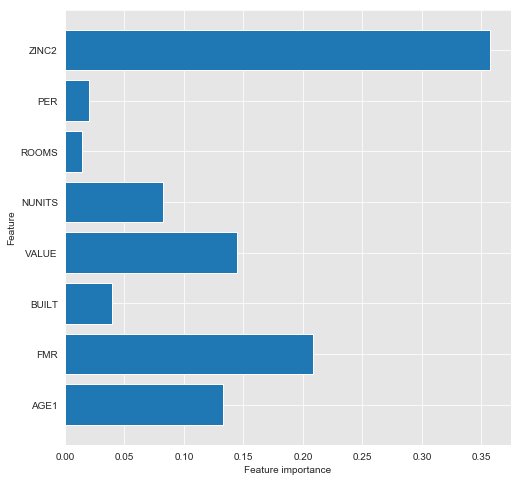

In [116]:
plot_feature_importances(clf)

The final features.

In [117]:
sm = SMOTE(random_state=0)
X_train_resampledXGB, y_train_resampledXGB = sm.fit_sample(X_train_2, y_train_2.ravel())
print(pd.Series(y_train_resampledXGB).value_counts())
print()

0    22344
1    22344
dtype: int64



In [118]:
X_train_resXGB, X_test_resXGB, y_train_resXGB, y_test_resXGB = train_test_split(X_train_resampledXGB, y_train_resampledXGB, random_state=0)

In [119]:
clf = xgb.XGBClassifier()
clf.fit(X_train_resXGB, y_train_resXGB)
training_preds = clf.predict(X_train_resXGB)
val_preds = clf.predict(X_test_resXGB)
training_accuracy = accuracy_score(y_train_resXGB, training_preds)
val_accuracy = accuracy_score(y_test_resXGB, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 81.98%
Validation accuracy: 80.8%


In [120]:
y_hat_test_xgb = clf.predict(X_test_resXGB)

In [121]:
from sklearn.metrics import confusion_matrix

cnf_matrix_xgb = confusion_matrix(y_hat_test_xgb, y_test_resXGB)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[6127 1369]
 [1488 3428]]


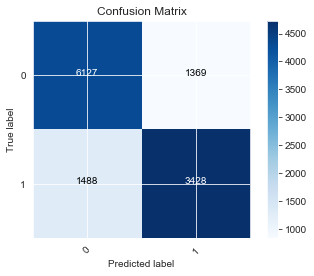

In [122]:
plt.imshow(cnf_matrix_xgb,  cmap=plt.cm.Blues) #Create the basic matrix.

#Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')


class_names = set(y) 
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)


thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")


plt.colorbar()